<a href="https://colab.research.google.com/github/Almuzhidul/Machine-Learning-from-Scratch/blob/main/KNN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model K-Nearest Neighbours**

## **Ide Dasar**
Mengklasifikasikan sebuah data ke dalam sebuah kelas didasarkan pada tetangga terdekatnya
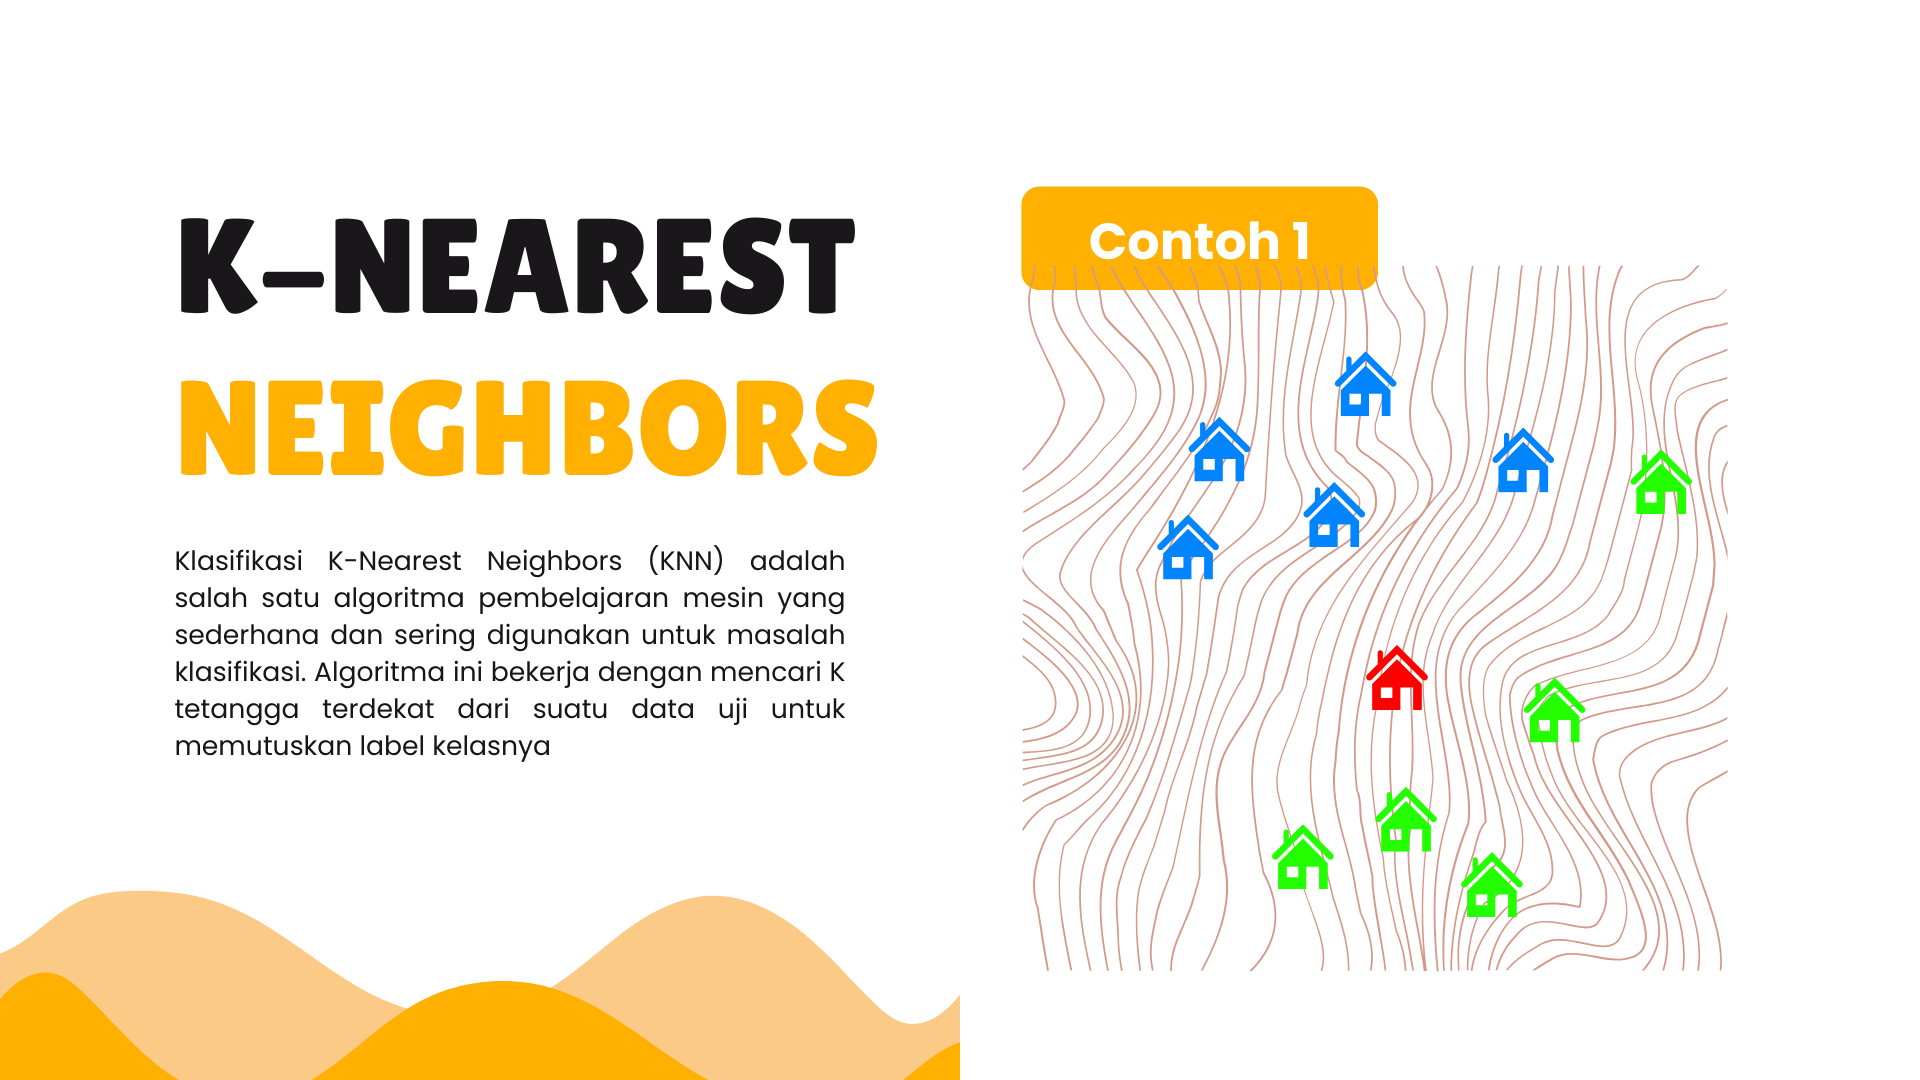

### Algoritma KNN
Klasifikasi dengan algoritma KNN dilakukan dengan langkah-langkah berikut:
1. Menghitung jarak antara data uji dan masing-masing data latih
2. Mengurutkan jarak dari terdekat hingga terjauh
3. Mengambil sejumlah k teratas dari vektor jarak(Tetangga)
4. Mengambil kelas yang paling sering muncul pada baris yang dipilih
5. Memilih kelas dari data prediksi

### Kelebihan
Fase pelatihan klasifikasi tetangga terdekat K jauh lebih cepat dibandingkan dengan algoritma klasifikasi lainnya. Tidak perlu melatih model untuk generalisasi, itulah sebabnya KNN dikenal sebagai algoritma pembelajaran sederhana dan berbasis instans. KNN dapat berguna dalam kasus data nonlinier. Ini bisa digunakan dengan masalah regresi. Nilai output untuk objek dihitung dengan rata-rata nilai k tetangga terdekat.

### Kekurangan
Fase pengujian klasifikasi K-terdekat tetangga lebih lambat dan lebih mahal dalam hal waktu dan memori. Ini membutuhkan memori yang besar untuk menyimpan seluruh set data pelatihan untuk prediksi. KNN memerlukan penskalaan data karena KNN menggunakan jarak Euclidean antara dua titik data untuk menemukan tetangga terdekat. Jarak euclidean sensitif terhadap magnitudo. Fitur dengan magnitudo tinggi akan lebih berbobot daripada fitur dengan magnitudo rendah. KNN juga tidak cocok untuk data berdimensi besar.

### Meningkatkan KNN
Untuk hasil yang lebih baik, sangat disarankan untuk menormalkan data pada skala yang sama. Umumnya, rentang normalisasi dianggap antara 0 dan 1. KNN tidak cocok untuk data berdimensi besar. Dalam kasus seperti itu, dimensi perlu dikurangi untuk meningkatkan kinerja. Selain itu, menangani nilai yang hilang akan membantu kami meningkatkan hasil.


## **Implementasi Pada Python dari Dasar (from scratch)**

**Fungsi-fungsi pada KNN**

In [ ]:
# Import Module numpy, dataset, dan matplotlib
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [ ]:
# Membuka data
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Membagi data menjadi data latih dan data uji
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
# Mendefinisikan jarak Euclidean
def jarak_euclidean(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

In [ ]:
# Klasifikasi KNN untuk satu data uji
def knn(X_latih, X_uji, y_latih, k):
    # Hitung jarak antara x dan semua contoh di set pelatihan
    jarak = [jarak_euclidean(X_uji, x_latih) for x_latih in X_latih]
    print(jarak)
    # Urutkan berdasarkan jarak dan indeks kembalian dari k tetangga pertama
    k_idx = np.argsort(jarak)[:k]
    print(k_idx)
    # Ekstrak label k sampel pelatihan tetangga terdekat
    k_tetangga_labels = [y_latih[i] for i in k_idx]
    print(k_tetangga_labels)
    # mengembalikan label kelas yang paling umum
    label_populer = Counter(k_tetangga_labels).most_common(2)
    print(label_populer)
    return label_populer[0][0], k_idx

In [ ]:
# Klasifikasi KNN untuk sebuah vektor data uji
def KNN(X_latih, X_uji, y_latih, k):
    y_pred=[]
    for x in X_uji:
        pred, tetangga=knn(X_latih, x, y_latih, k)
        y_pred.append(pred)
    return np.array(y_pred)

In [ ]:
# Membuat fungsi untuk mengukur akurasi
def akurasi(y_asli, y_pred):
    akr = np.sum(y_asli == y_pred) / len(y_asli)
    return akr*100

In [ ]:
 X_uji[0]

array([6.1, 3. , 4.6, 1.4])

In [ ]:
X_latih[0:5]

array([[5.1, 2.5, 3. , 1.1],
       [6.2, 2.8, 4.8, 1.8],
       [5. , 3.5, 1.3, 0.3],
       [6.3, 2.8, 5.1, 1.5],
       [6.7, 3. , 5. , 1.7]])

In [ ]:
y_latih[0:5]

array([1, 2, 0, 2, 1])

In [ ]:
k=3

**Prediksi satu data uji**

In [ ]:
prediksi, tetangga=knn(X_latih, X_uji[0], y_latih, 8)

[1.9748417658131496, 0.5000000000000003, 3.6823905279043934, 0.5830951894845302, 0.7810249675906661, 3.252691193458118, 3.818376618407356, 3.2403703492039293, 4.124318125460256, 1.884144368141677, 3.5972211497209896, 0.8185352771872448, 3.6496575181789312, 1.3076696830622023, 1.8357559750685826, 3.5707142142714243, 1.174734012447073, 1.2369316876852987, 2.37065391822594, 1.5394804318340654, 3.622154055254966, 0.9380831519646865, 2.596150997149434, 0.34641016151377546, 1.9104973174542794, 1.1269427669584642, 0.5196152422706631, 0.8660254037844396, 0.5196152422706631, 3.563705936241092, 3.494281041931229, 2.056696380120314, 0.9643650760992954, 0.9000000000000002, 3.478505426185217, 3.671511950137164, 3.59583091927304, 0.8366600265340758, 1.0816653826391964, 1.0770329614269007, 1.6941074346097422, 0.4690415759823425, 3.640054944640259, 0.9591663046625443, 3.4684290392049246, 2.7349588662354694, 3.5679125549822546, 0.19999999999999973, 0.714142842854285, 3.2726136343907135, 0.7681145747868

In [ ]:
prediksi

1

In [ ]:
print(tetangga)

[ 47  23  65  54  41  55   1 105]


**Prediksi data uji dalam bentuk vektor**

In [ ]:
pred=KNN(X_latih, X_uji, y_latih, 3)

In [ ]:
akurasi(y_uji, pred)

100.0

In [ ]:
y_uji

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

In [ ]:
pred

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

## **Model KNN Menggunakan Scikit Learn**

In [ ]:
# Mengimpor model KNN dari Scikit-Learn
from sklearn.neighbors import KNeighborsClassifier

# Klasifikasi dengan sejumlah K=3 Tetangga Terdekat
neigh = KNeighborsClassifier(n_neighbors=3)

# Memilih fitur dan label
neigh.fit(X_latih, y_latih)

# Kelas Hasil Prediksi
pred=neigh.predict(X_uji)
print(pred[0])

# 3 Tetangga Terdekat
tetangga=neigh.kneighbors(X_uji)[1]
print(tetangga[0])

1
[47 23 65]


In [ ]:
akurasi(y_uji, pred)

100.0